In [116]:
import pandas as pd
import numpy as np

**<h2 align ="center" style='color: white'>Model which Classifies customers based based on risk</h2>**

**<h4 align ="left" style='color: white'>EDA and Feature engineering was completed in previous steps</h4>**

In [118]:
cust_data_mixed2 = pd.read_csv('data/CustDataMixed2.csv')
cust_data_mixed2.head()

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
0,Abdul,Ruby,12475,New York,Ulster,Ruby,C5841053,T1,17819.05,2/8/16,143207.0,25.0,Moderate,45,Unemployed
1,Abdul,Ruby,29741,South Carolina,Chesterfield,Ruby,C2142763,T2,2270.69,2/8/16,141858.0,27999.0,Moderate,29,Employed
2,Abdul,Ruby,99768,Alaska,Yukon-Koyukuk,Ruby,C4417068,T3,17874.44,2/8/16,142712.0,459.0,Moderate,37,Employed
3,Mohammad,Louise,77455,Texas,Wharton,Louise,C5342380,T4,866503.21,2/8/16,142714.0,2060.0,Very Low,97,Retired
4,Mohammad,Louise,77455,Texas,Wharton,Louise,C5342380,T391139,3195.78,13/8/16,194148.0,878.4,Very Low,73,Retired


In [119]:
cust_data_mixed2.shape

(1415088, 15)

**<h4 align ="left" style='color: white'>Working with sample size of 8,540</h4>**

In [120]:
random_columns2 = cust_data_mixed2.sample(n=8540, axis=0, random_state=42,replace=True)
random_columns2.head()

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
121958,Abib,Everett,98203,Washington,Snohomish,Everett,C9041037,T90626,20117.73,22/9/16,112336.0,1.00,Low,55,High Income
671155,Abdulstar,Bruce,54819,Wisconsin,Rusk,Bruce,C3949786,T497355,47388.11,20/8/16,162156.0,820.00,Very Low,95,Retired
131932,Neleem,Sandy,84092,Utah,Salt Lake,Sandy,C8532260,T97961,5253.99,1/8/16,173800.0,558.25,Low,61,High Income
1414414,Abdulkarim,Marion,66861,Kansas,Marion,Marion,C7956176,T1048046,6067.04,18/9/16,74051.0,20.00,Low,47,Student
259178,Khushi Ram,Eugene,97401,Oregon,Lane,Eugene,C6921752,T192099,14446.45,9/8/16,205656.0,350.00,Moderate,28,Employed


In [122]:
random_columns2.shape

(8540, 15)

In [123]:
df = random_columns2.copy()

In [124]:
risk_level_by_age = df.groupby('Risk Level')['Age'].describe()
risk_level_by_age

,count,mean,std,min,25%,50%,75%,max
Risk Level,,,,,,,,
High,377.0,20.559682,5.348719,18.0,18.0,20.0,21.0,55.0
Low,2787.0,56.266954,9.939721,21.0,50.0,57.0,64.0,70.0
Moderate,1900.0,35.020526,6.379857,18.0,31.0,35.0,40.0,45.0
Very High,193.0,27.378238,13.834097,22.0,23.0,24.0,25.0,96.0
Very Low,3283.0,81.560158,15.959165,19.0,76.0,84.0,92.0,99.0


In [125]:
df.head(5)

,Lastname,First Name,zip,state,county,city,CustomerID,TransactionID,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (USD),Risk Level,Age,Status
121958,Abib,Everett,98203,Washington,Snohomish,Everett,C9041037,T90626,20117.73,22/9/16,112336.0,1.00,Low,55,High Income
671155,Abdulstar,Bruce,54819,Wisconsin,Rusk,Bruce,C3949786,T497355,47388.11,20/8/16,162156.0,820.00,Very Low,95,Retired
131932,Neleem,Sandy,84092,Utah,Salt Lake,Sandy,C8532260,T97961,5253.99,1/8/16,173800.0,558.25,Low,61,High Income
1414414,Abdulkarim,Marion,66861,Kansas,Marion,Marion,C7956176,T1048046,6067.04,18/9/16,74051.0,20.00,Low,47,Student
259178,Khushi Ram,Eugene,97401,Oregon,Lane,Eugene,C6921752,T192099,14446.45,9/8/16,205656.0,350.00,Moderate,28,Employed


In [126]:
y = df['Risk Level']
X = df[['Age', 'Status', 'city','zip']]

In [127]:
y.head(5)

121958          Low
671155     Very Low
131932          Low
1414414         Low
259178     Moderate
Name: Risk Level, dtype: object

In [128]:
X['Status'].value_counts(dropna=False)

Status
Retired        2986
High Income    2688
Employed       2034
Student         476
Unemployed      356
Name: count, dtype: int64

In [130]:
X.head(5)

,Age,Status,city,zip
121958,55,High Income,Everett,98203
671155,95,Retired,Bruce,54819
131932,61,High Income,Sandy,84092
1414414,47,Student,Marion,66861
259178,28,Employed,Eugene,97401


**<h4 align ="left" style='color: white'>One hot encoding for categorical variables in X which is norminal (Variables that are not ranked)</h4>**

In [132]:
# one hot encoding for categorical variables in X which is norminal

In [133]:
X_encoded = pd.get_dummies(X, columns=['Status', 'city'], drop_first=True)
X_encoded.head()

,Age,zip,Status_High Income,Status_Retired,Status_Student,Status_Unemployed,city_Addison,city_Adell,city_Adolphus,city_Adrian,...,city_Winston,city_Winter,city_Winton,city_Woodford,city_Woodrow,city_Worth,city_Wright,city_Wyatt,city_Zachary,city_Zoe
121958,55,98203,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
671155,95,54819,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
131932,61,84092,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1414414,47,66861,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
259178,28,97401,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**<h4 align ="left" style='color: white'>OrdinalEncoder encoding for y which is Ordinal Variable  (Variable which can be ranked) </h4>**

In [134]:
# one hot encoding for categorical variables in y which is Ordinal

In [135]:
from sklearn.preprocessing import OrdinalEncoder

# Reshape y to a 2D array as required by OrdinalEncoder
y_reshaped = y.values.reshape(-1, 1)

# Apply OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
y_encoded = ordinal_encoder.fit_transform(y_reshaped)

# Convert back to a pandas Series for convenience
y_encoded = pd.Series(y_encoded.flatten(), name='Risk Level Encoded')

y_encoded.head()

0    1.0
1    4.0
2    1.0
3    1.0
4    2.0
Name: Risk Level Encoded, dtype: float64

In [136]:
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification to handle class imbalance
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6832, 920)
X_test shape: (1708, 920)
y_train shape: (6832,)
y_test shape: (1708,)


**<h4 align ="left" style='color: white'>Training and comparing different models </h4>**

In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "xgb_model": XGBClassifier(random_state=42),
    "knn_model" : KNeighborsClassifier(n_neighbors=5),
    "ada_model " : AdaBoostClassifier(random_state=42),
    "mlp_model" : MLPClassifier(random_state=42, max_iter=500),
    "svm_model" : SVC(class_weight='balanced', random_state=42)

   
    
    
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }
    
    # Print classification report
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning

Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79        75
         1.0       0.98      0.96      0.97       557
         2.0       0.83      1.00      0.91       380
         3.0       0.00      0.00      0.00        39
         4.0       0.99      1.00      0.99       657

    accuracy                           0.95      1708
   macro avg       0.76      0.72      0.73      1708
weighted avg       0.93      0.95      0.93      1708

--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96        75
         1.0       0.99      1.00      0.99       557
         2.0       0.99      1.00      1.00       380
         3.0       1.00      0.97      0.99        39
         4.0       1.00      1.00      1.00       657

    accuracy                           0.99      1708
   macro avg       0.99      0.9

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model: Support Vector Machine
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        75
         1.0       0.00      0.00      0.00       557
         2.0       0.00      0.00      0.00       380
         3.0       0.00      0.00      0.00        39
         4.0       0.38      1.00      0.56       657

    accuracy                           0.38      1708
   macro avg       0.08      0.20      0.11      1708
weighted avg       0.15      0.38      0.21      1708

--------------------------------------------------
Model: xgb_model
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        75
         1.0       0.99      0.99      0.99       557
         2.0       0.99      1.00      1.00       380
         3.0       1.00      0.97      0.99        39
         4.0       1.00      1.00      1.00       657

    accuracy                           0.99      1708
   macro avg       0.99      0.98

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

Model: mlp_model
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        75
         1.0       0.88      0.01      0.02       557
         2.0       0.00      0.00      0.00       380
         3.0       0.00      0.00      0.00        39
         4.0       0.40      1.00      0.57       657

    accuracy                           0.43      1708
   macro avg       0.45      0.37      0.30      1708
weighted avg       0.48      0.43      0.27      1708

--------------------------------------------------
Model: svm_model
              precision    recall  f1-score   support

         0.0       0.06      0.16      0.09        75
         1.0       0.00      0.00      0.00       557
         2.0       0.26      0.46      0.33       380
         3.0       0.02      0.51      0.05        39
         4.0       0.32      0.01      0.02       657

    accuracy                           0.12      1708
   macro avg       0.13      0.23      0.10   

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

**<h4 align ="left" style='color: white'>Model evaluation with Confusion Matrix</h4>**

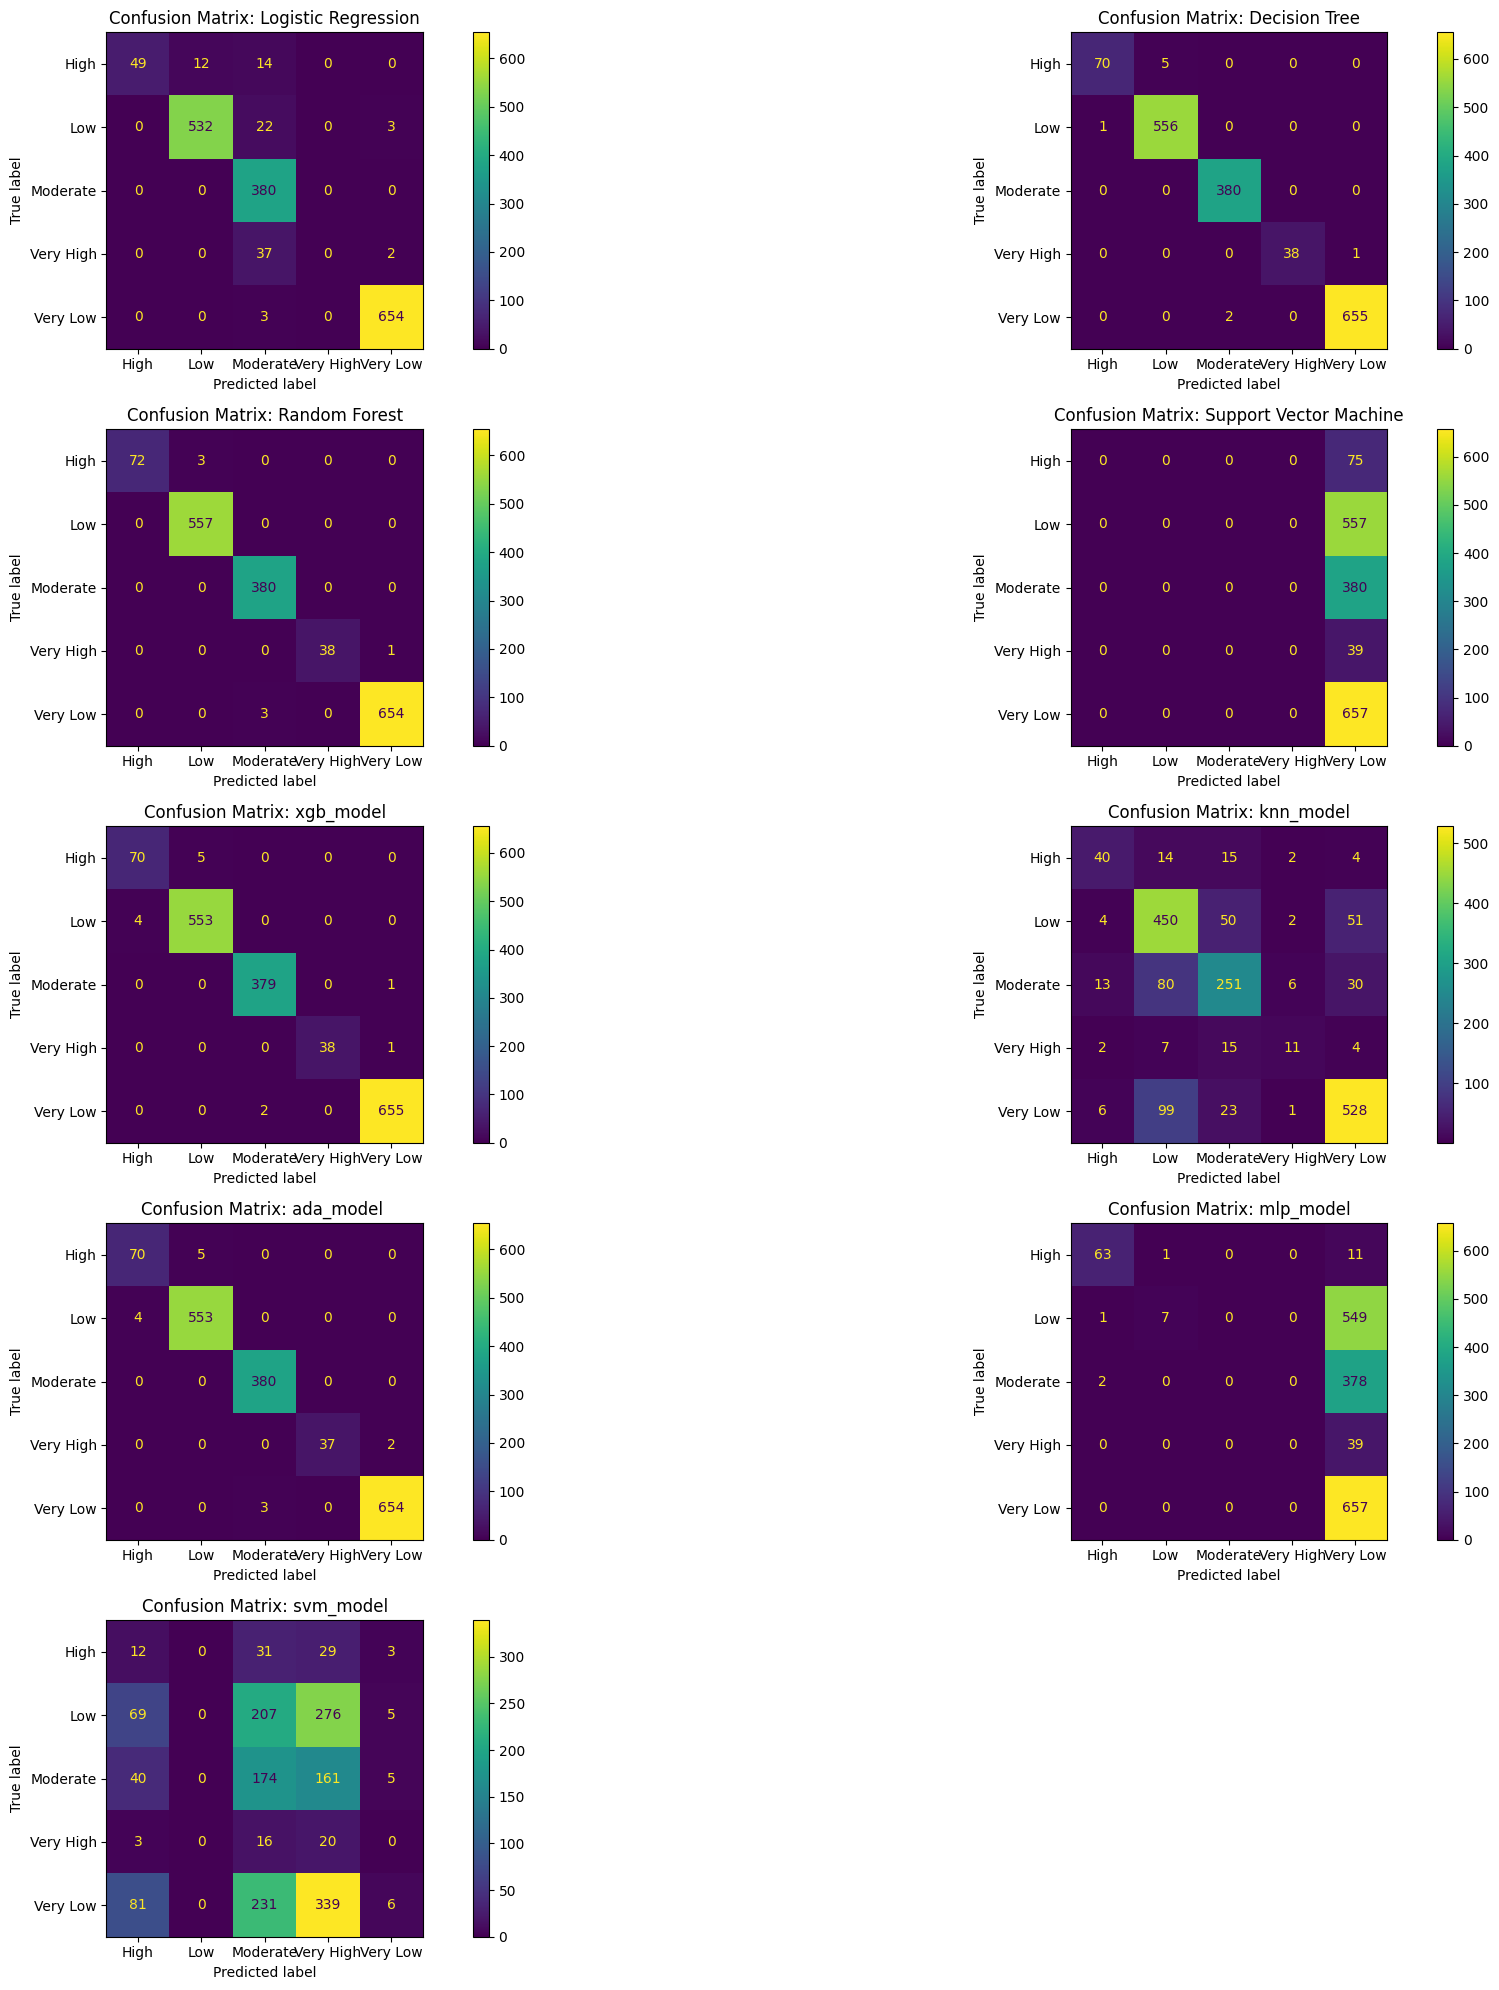

In [139]:
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Plot confusion matrices for each model
fig, axes = plt.subplots(nrows=(len(models) + 2) // 2, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[idx], display_labels=ordinal_encoder.categories_[0])
    axes[idx].set_title(f"Confusion Matrix: {model_name}")

# Hide any unused subplots
for i in range(len(models), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**<h4 align ="left" style='color: white'>Results Based on F1, Precision and Accuracy</h4>**

In [140]:
# Function to rank models based on a specific metric
def rank_models(results, metric):
    return sorted(results.items(), key=lambda x: x[1][metric], reverse=True)

# Rank models based on F1 Score, Precision, and Accuracy
ranked_by_f1 = rank_models(results, "F1 Score")
ranked_by_precision = rank_models(results, "Precision")
ranked_by_accuracy = rank_models(results, "Accuracy")

# Display rankings
print("Ranking by F1 Score:")
for rank, (model, scores) in enumerate(ranked_by_f1, start=1):
    print(f"{rank}. {model}: {scores['F1 Score']:.4f}")

print("\nRanking by Precision:")
for rank, (model, scores) in enumerate(ranked_by_precision, start=1):
    print(f"{rank}. {model}: {scores['Precision']:.4f}")

print("\nRanking by Accuracy:")
for rank, (model, scores) in enumerate(ranked_by_accuracy, start=1):
    print(f"{rank}. {model}: {scores['Accuracy']:.4f}")

Ranking by F1 Score:
1. Random Forest: 0.9959
2. Decision Tree: 0.9947
3. xgb_model: 0.9924
4. ada_model : 0.9918
5. Logistic Regression: 0.9344
6. knn_model: 0.7475
7. mlp_model: 0.2679
8. Support Vector Machine: 0.2137
9. svm_model: 0.0862

Ranking by Precision:
1. Random Forest: 0.9959
2. Decision Tree: 0.9947
3. xgb_model: 0.9924
4. ada_model : 0.9918
5. Logistic Regression: 0.9300
6. knn_model: 0.7511
7. mlp_model: 0.4819
8. svm_model: 0.1833
9. Support Vector Machine: 0.1480

Ranking by Accuracy:
1. Random Forest: 0.9959
2. Decision Tree: 0.9947
3. xgb_model: 0.9924
4. ada_model : 0.9918
5. Logistic Regression: 0.9456
6. knn_model: 0.7494
7. mlp_model: 0.4256
8. Support Vector Machine: 0.3847
9. svm_model: 0.1241


In [143]:
# from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier

# # Add XGBoost and KNN to the models dictionary
# models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# models["K-Nearest Neighbors"] = KNeighborsClassifier()

# # Train and evaluate each model
# for model_name, model in models.items():
#     # Train the model
#     model.fit(X_train, y_train)
    
#     # Predict on the test set
#     y_pred = model.predict(X_test)
    
#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
    
#     # Store the results
#     results[model_name] = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1 Score": f1
#     }
    
#     # Print classification report
#     print(f"Model: {model_name}")
#     print(classification_report(y_test, y_pred))
#     print("-" * 50)

# # Display the results
# for model_name, metrics in results.items():
#     print(f"{model_name}:")
#     for metric, value in metrics.items():
#         print(f"  {metric}: {value:.4f}")
#     print()